In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

[-4.05741625e-16  4.00000000e+00 -8.15503702e-16 -8.88178420e-16
 -1.84903156e-15 -2.22044605e-15 -2.59186054e-15  4.00000000e+00]
[ 0.00000000e+00 -3.55951662e-16  1.33226763e-15  6.89018570e-16
  0.00000000e+00 -1.02208548e-15 -3.77475828e-15 -1.08733827e-15]


"\nfrom scipy import interpolate\n\ntck = interpolate.splrep(x,f,s=0.1)\nynew = interpolate.splev(x,tck,der=0)\n\nplt.plot(x,ynew, label = 'b spline')\n\nplt.legend()\n"

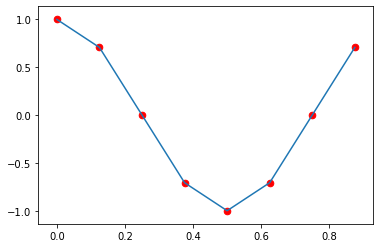

In [21]:
n = 8
Omg = np.zeros((n,n), dtype = complex)
for j in range(n):
    for i in range(n):
        W = np.exp(-2*np.pi*complex(0,1)/n)
        Omg[j][i]=pow(W,i*j)
        
from scipy import linalg
x = np.arange(n)/float(n)
f = np.cos(2*np.pi*x)
ft = Omg.dot(f)
print(ft.real)
print(ft.imag)

plt.plot(x,f)
plt.scatter(x,f,color = 'red', s = 43.5)

'''
from scipy import interpolate

tck = interpolate.splrep(x,f,s=0.1)
ynew = interpolate.splev(x,tck,der=0)

plt.plot(x,ynew, label = 'b spline')

plt.legend()
'''

FFT in Python

In [22]:
import numpy as np
np.fft.fft(f)
np.fft.fft2(f)
np.fft.fftn(f)

np.fft.ifft(f)
np.fft.ifft2(f)
np.fft.ifftn(f)

np.fft.fftfreq(n,d)

np.fft.fftshift(x)

ValueError: axes exceeds dimensionality of input

1D Example 1 

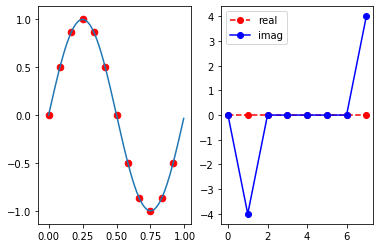

In [61]:
n = 180
Omg = np.zeros((n,n), dtype = complex)
for j in range(n):
    for i in range(n):
        W = np.exp(-2*np.pi*complex(0,1)/n)
        Omg[j][i]=pow(W,i*j)
        
from scipy import linalg
x = np.arange(n)/float(n)
f = np.sin(2*np.pi*x)
ft = Omg.dot(f)
# print(ft.real)
# print(ft.imag)

plt.subplot(121)
plt.plot(x,f)
plt.scatter(x[::15],f[::15],color = 'red', s = 43.5)
plt.subplot(122)
fsamp = 8.
t = np.arange(0, 1, 1/fsamp)
f = np.sin(2*np.pi*t)
F = np.fft.fft(f)
plt.plot(F.real, 'ro--', label='real')
plt.plot(F.imag, 'bo-', label='imag')
plt.legend()

1D Example 2


In [85]:
A1,A2=2,1 
freq1,freq2=10,50 
fsamp=256.
t=np.arange(0,1,1/fsamp) 
n=len(t)
f=A1*np.sin(2*np.pi*freq1*t) + A2*np.cos(2*np.pi*freq2*t) 
f += 0.2*np.random.randn(n)
F=np.fft.fft(f) 
freq=np.fft.fftfreq(n,1/fsamp)  # freq_image=[0,1,…,126,127,-128,-127,…-1] 
F_shifted=np.fft.fftshift(F)# F_shift[n/2]=F[0], etc.
freq_shifted=np.fft.fftshift(freq) # freq_shifted_image=[-128,-127,…-1,0,1,…127]

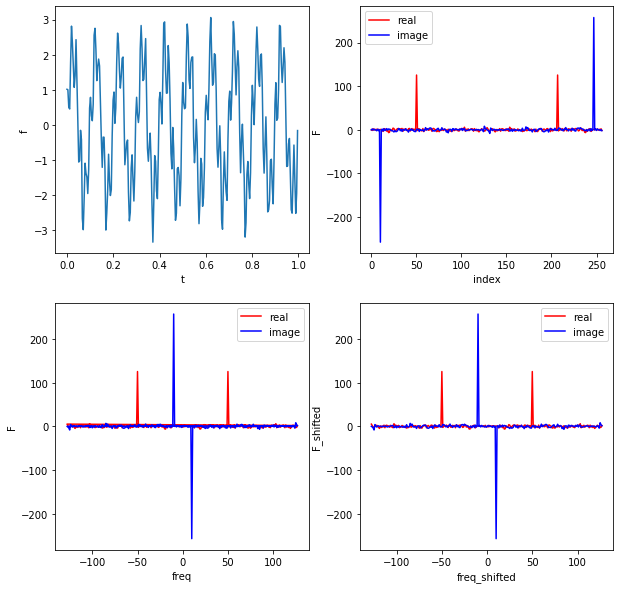

In [86]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.plot(t,f)
plt.xlabel('t')
plt.ylabel('f')

plt.subplot(222)
index = np.linspace(0, np.size(f), np.size(f))
plt.plot(index, F.real, color = 'red', label = 'real')
plt.plot(index, F.imag, color = 'blue', label = 'image')

plt.xlabel('index')
plt.ylabel('F')
plt.legend()

plt.subplot(223)
plt.plot(freq, F.real, color = 'red', label = 'real')
plt.plot(freq, F.imag, color = 'blue', label = 'image')
plt.xlabel('freq')
plt.ylabel('F')
plt.legend()

plt.subplot(224)
plt.plot(freq_shifted, F_shifted.real, color = 'red', label = 'real')
plt.plot(freq_shifted, F_shifted.imag, color = 'blue', label = 'image')
plt.xlabel('freq_shifted')
plt.ylabel('F_shifted')
plt.legend()
plt.show()


In [83]:
import numpy as np
fsamp = 8
t = np.arange(0, 1, 1/fsamp)
f = np.sin(2*np.pi*t)
F=np.fft.fft(f)
iF = np.fft.ifft(F)
print(iF.real)
print(iF.imag)

[ 1.23259516e-32  7.07106781e-01  1.00000000e+00  7.07106781e-01
  1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01]
[ 0.00000000e+00 -1.62588398e-17  0.00000000e+00  2.29934717e-17
  0.00000000e+00  1.62588398e-17  0.00000000e+00 -2.29934717e-17]


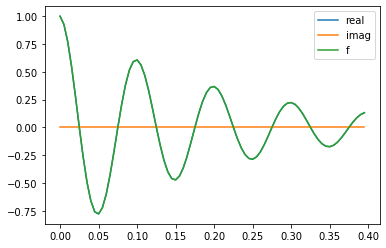

In [114]:
plt.plot(t, iF.real, label = 'real')
plt.plot(t, iF.imag, label = 'imag')
plt.plot(t, f, label = 'f')
plt.legend()

Exercise

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


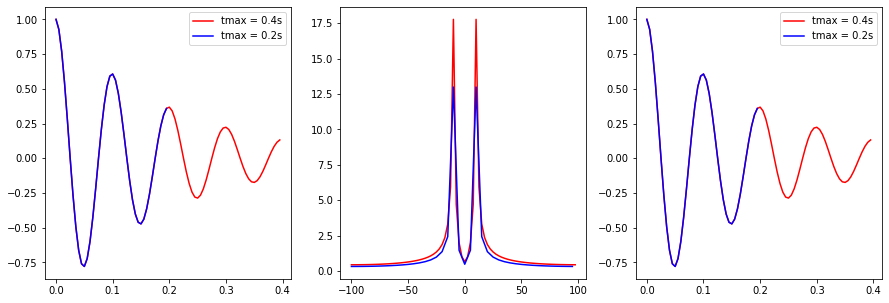

In [129]:
def function(x):
    tmax = x
    v = 10
    tau = 0.2
    fsamp = 200

    t = np.arange(0, tmax, 1/fsamp)
    freq=np.fft.fftfreq(len(t),1/fsamp)
    f = np.cos(2*np.pi*v*t)*np.exp(-t/tau)
    F=np.fft.fft(f)
    iF = np.fft.ifft(F)
    
    F_shifted=np.fft.fftshift(F)# F_shift[n/2]=F[0], etc.
    freq_shifted=np.fft.fftshift(freq) # freq_shifted_image=[-128,-127,…-1,0,1,…127]
    return F, iF, t, f, freq, F_shifted, freq_shifted


F1, iF1, t1, f1, freq1, F_shifted1, freq_shifted1= function(0.4)
F2, iF2, t2, f2, freq2, F_shifted2, freq_shifted2= function(0.2)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(t1, f1, color = 'red', label = 'tmax = 0.4s')
plt.plot(t2, f2, color = 'blue', label = 'tmax = 0.2s')
plt.legend()
plt.subplot(132)
#plt.plot(freq1, abs(F1), color = 'red')
#plt.plot(freq2, abs(F2), color = 'blue')

plt.plot(freq_shifted1, abs(F_shifted1), color = 'red')
plt.plot(freq_shifted2, abs(F_shifted2), color = 'blue')

plt.subplot(133)
plt.plot(t1, iF1, color = 'red', label = 'tmax = 0.4s')
plt.plot(t2, iF2, color = 'blue', label = 'tmax = 0.2s')
plt.legend()

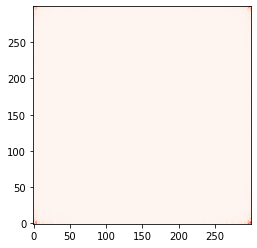

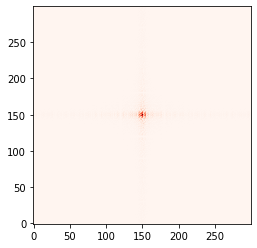

In [122]:
ncols,nrows=300,300
image=np.zeros((ncols,nrows))
image[20:30,50:70]=1. 
image[120:180,200:250]=1.
image[130:170,130:170]=1. 
image[220:250,70:100]=1.
ftimage=np.fft.fft2(image)
ftshift=np.fft.fftshift(ftimage)

plt.imshow(image,cmap='Reds',origin='lower')
plt.imshow(np.abs(ftimage),cmap='Reds', origin='lower')
plt.show()
plt.imshow(np.abs(ftshift),cmap='Reds', origin='lower')

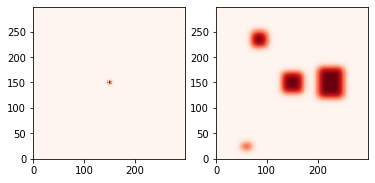

In [126]:
# Build and apply a Gaussian filter. 
image=np.zeros((ncols,nrows))
sigmax, sigmay = 10, 10 
cy, cx = nrows/2, ncols/2 
x=np.linspace(0, nrows, nrows)
y=np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y) 
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
ftgmask = ftshift * gmask # Take the inverse transform to get an blurred image 
imgmask = np.fft.ifft2(ftgmask) 
plt.subplot(121)
plt.imshow(np.abs(ftgmask),cmap= 'Reds',origin='lower')
plt.subplot(122)
plt.imshow(np.abs(imgmask),cmap= 'Reds',origin='lower')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

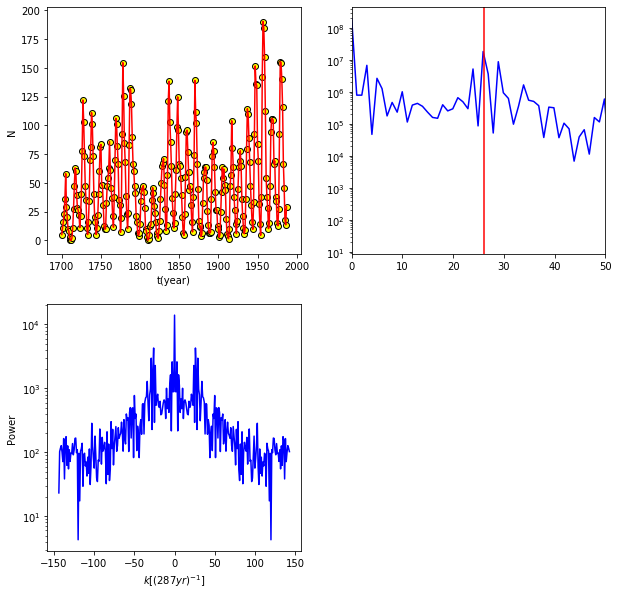

In [35]:
f2=open('sunspot.dat.txt', 'r')
import numpy as np
year,spotnumber=np.loadtxt(f2,unpack=True,usecols=[0,1])


plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(year, spotnumber, color='red')
plt.scatter(year, spotnumber, color = 'yellow', edgecolor='black')
plt.xlabel('t(year)')
plt.ylabel('N')

F = np.fft.fft(spotnumber)
F_shift = np.fft.fftshift(F)

fsamp = 287

freq=np.fft.fftfreq(len(year),1/fsamp)
freq_shifted=np.fft.fftshift(freq) 

plt.subplot(223)
plt.plot(freq_shifted, np.abs(F_shift), color = 'blue')
plt.yscale('log')
plt.xlabel(r'$k[(287yr)^{-1}]$')
plt.ylabel('Power')

plt.subplot(222)
plt.plot(freq_shifted, np.abs(F_shift)**2, color = 'blue')
plt.xlim(0,50)
plt.yscale('log')
plt.axvline(26, color='red')


# Exercise

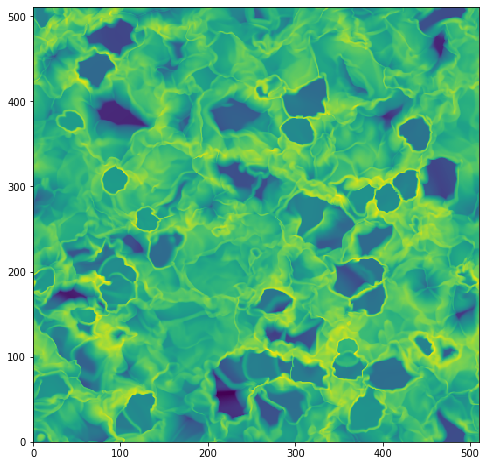

In [44]:
fn = 'U10d4008_density.dat.txt' 
y =np.loadtxt(fn)
n=512
den=np.zeros((n,n))
for j in range(n):
    for i in range(n):
        k = i + (j-1)*n
        den[j,i] = y[k]

    
x = range(n)
y=range(n)
logden=np.log10(den)

plt.figure(figsize=(8, 8))
plt.pcolormesh(x,y,logden.T, vmin=-4, vmax=2)

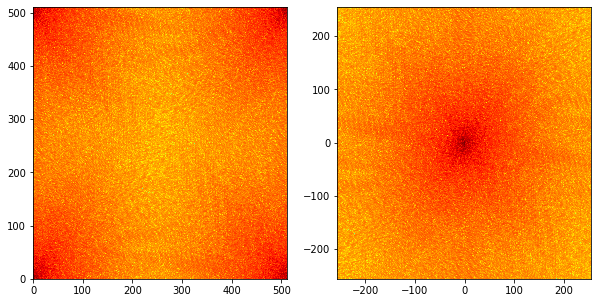

In [50]:
plt.figure(figsize=(10, 5))
Fden=np.fft.fft2(den) 
powF=np.abs(Fden)**2 
powF[0,0]=1.e-10 
lpowF=np.log10(powF) 
cmap='jet' 
plt.subplot(121)
plt.pcolormesh(x,y,lpowF.T, cmap=cmap)
lpow_shift=np.fft.fftshift(lpowF) 
k=np.fft.fftfreq(n,1./n) 
k_shift=np.fft.fftshift(k) 
plt.subplot(122)
plt.pcolormesh(k_shift,k_shift, lpow_shift.T,cmap=cmap)

(100000, 32030429918.27586)

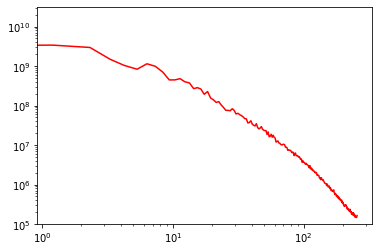

In [52]:
powF_shift=np.fft.fftshift(powF) 
nset=int(n/2)
k_sum=np.zeros(nset)
p_sum=np.zeros(nset)
nfreq=np.zeros(nset)
for j in range(n): 
    for i in range(n): 
        amp_k = np.sqrt(k_shift[i]**2 + k_shift[j]**2)
        kbin=int(amp_k)
        if(kbin < nset): 
            k_sum[kbin] += amp_k 
            p_sum[kbin] += powF_shift[i,j] 
            nfreq[kbin] += 1.
avg_k=k_sum/nfreq 
avg_p=p_sum/nfreq
plt.loglog(avg_k,avg_p,'r')
plt.ylim(10**5)

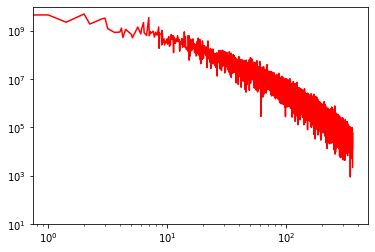

In [84]:

kamp=np.sqrt(k_shift[:,None]**2 + k_shift**2 ) 
kdist,indx=np.unique(kamp,return_inverse=True) 
Pk = np.bincount(indx,weights=powF_shift.ravel())
Pk /= np.bincount(indx)

plt.loglog(kdist,Pk, color = 'red')
plt.ylim(10, 10**10)
plt.show()


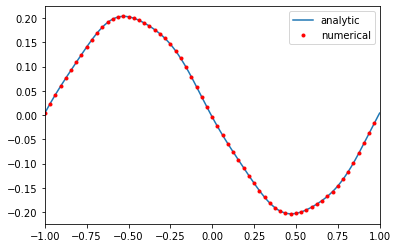

In [111]:
def f(x):
    f = 2*np.sin(np.pi*x) + np.cos(5*np.pi*x)
    return f

def u_sol(x):
    u = -2*np.sin(np.pi*x)/(np.pi)**2 - np.cos(5*np.pi*x)/(5*np.pi)**2
    return u


N = 64
a = -1
b = 1
h = (b - a)/N
L = N*h


x = np.arange(a, b ,h)
fx = f(x)

lam = np.zeros(N)
for k in range(N):
    lam[k] = -4*(np.sin(np.pi*k*h/(L)))**2 / h**2

F = np.fft.fft(fx)
U = np.zeros(N, dtype = complex)

for k in range(1, N):
    U[k] = F[k]/lam[k]
    
u = np.fft.ifft(U)

cut = 1000
xsol = np.linspace(a + (b - a)/cut, b, cut)
usol = u_sol(xsol)

plt.plot(xsol, usol, label = 'analytic')
plt.plot(x, u.real, 'ro', markersize = 3, label = 'numerical')
plt.xlim(a, b)
plt.legend(loc=1)

plt.show()

(474, 630)
float32


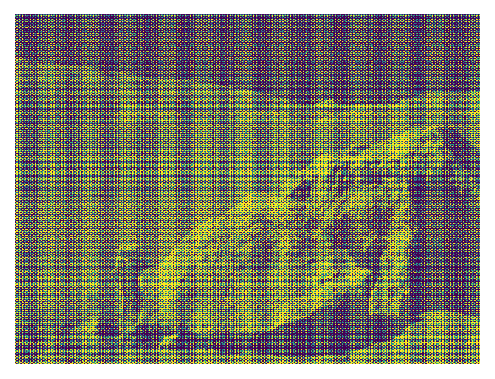

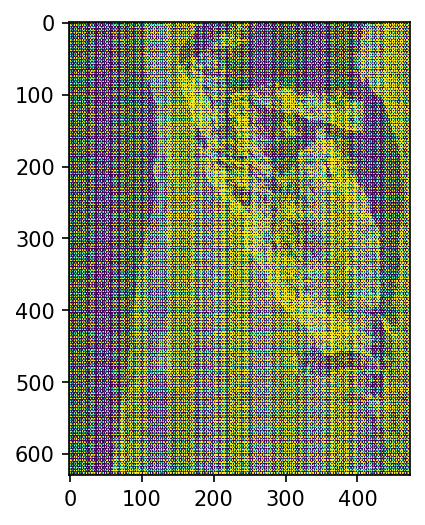

In [73]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread('moonlanding.png')
print(img.shape)
print(img.dtype)
fig=plt.figure(1, figsize=(4,4), dpi = 150)
plt.imshow(img)
plt.axis('off')
plt.show()

from scipy import ndimage
fig=plt.figure(1, figsize=(4,4), dpi = 150)
rot_img = ndimage.rotate(img, 90)
plt.imshow(rot_img)
plt.show()

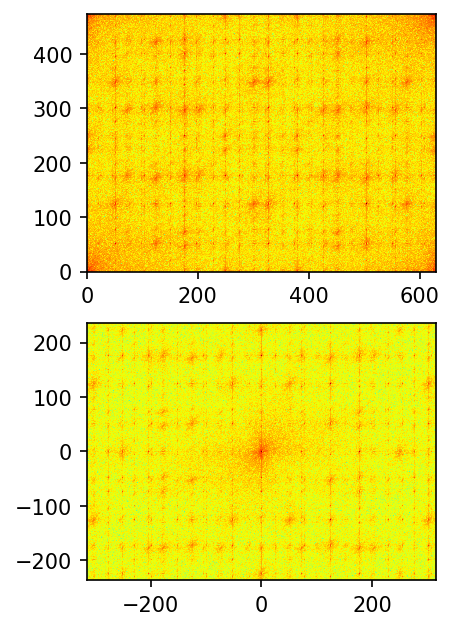

In [74]:
ly,lx=img.shape 
x=np.arange(lx) 
y=np.arange(ly)
Fimg=np.fft.fft2(img)
Fsft=np.fft.fftshift(Fimg)
kx=np.fft.fftfreq(lx,1./lx)
ky=np.fft.fftfreq(ly,1./ly) 
kx_shift=np.fft.fftshift(kx)
ky_shift=np.fft.fftshift(ky)
pimg=np.abs(Fimg)**2 
psft=np.abs(Fsft)**2 
pimg[0,0]=1.e-10 
psft[0,0]=1.e-10 
lpimg=np.log10(pimg) 
lpsft=np.log10(psft)
fig=plt.figure(1,figsize=(3,5),dpi=150)
cmap='jet'
plt.subplot(211)
plt.pcolormesh(x,y,lpimg,cmap=cmap)
plt.subplot(212) 
plt.pcolormesh(kx_shift,ky_shift,lpsft,cmap=cmap)
plt.show()

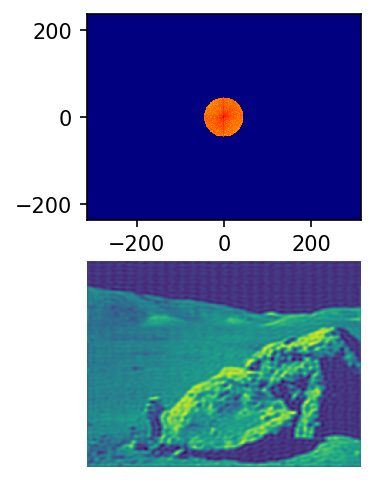

In [76]:
# generate meshgrid for masking 
Y, X = np.ogrid[0:ly, 0:lx] 
kcut=45.
plt.figure(1, fig=plt.figure(1, figsize=(4,4), dpi = 150))
mask1 = (X-lx/2.)**2 + (Y-ly/2.)**2 > kcut**2 
Fmask1=Fsft
Fmask1[mask1] = 1.e-10*complex(1,1)
psft=np.abs(Fmask1)**2 
psft[0,0]=1.e-10
lpsft=np.log10(psft)
plt.subplot(211) 
plt.pcolormesh(kx_shift,ky_shift,lpsft,cmap=cmap) 
ax=plt.gca()
ax.set_aspect('equal')
iFmask=np.fft.ifftshift(Fmask1)
iF=np.fft.ifft2(iFmask)
plt.subplot(212) 
plt.imshow(iF.real)
plt.axis('off')
plt.show()

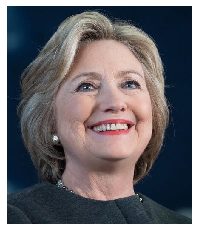

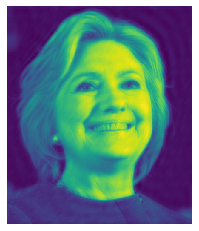

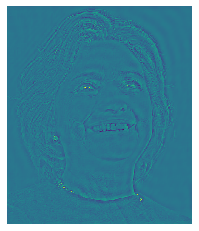

In [116]:
imgcli = plt.imread('clinton.jpg')
ly,lx,lz = imgcli.shape

plt.imshow(imgcli)
plt.axis('off')
Fcli0 = np.fft.fft2(imgcli[:,:,0])
Fcli0_h = np.fft.fftshift(Fcli0)
Fcli0_l = np.fft.fftshift(Fcli0)

X, Y = np.ogrid[0:ly, 0:lx]
kcut = 70
mask_h = (X-lx/2.)**2 + (Y-ly/2.)**2 > kcut**2.
mask_l = (X-lx/2.)**2 + (Y-ly/2.)**2 < kcut**2.
Fcli0_h[mask_h] = 1.e-10*complex(1,1)
Fcli0_l[mask_l] = 1.e-10*complex(1,1)

iFcli0_h = np.fft.ifftshift(Fcli0_h)
iFcli0_l = np.fft.ifftshift(Fcli0_l)

iFcli0h = np.fft.ifft2(iFcli0_h)
iFcli0l = np.fft.ifft2(iFcli0_l)


plt.imshow(imgcli)
plt.show()
plt.imshow(iFcli0h.real)
plt.axis('off')
plt.show()

plt.imshow(iFcli0l.real)
plt.axis('off')
plt.show()




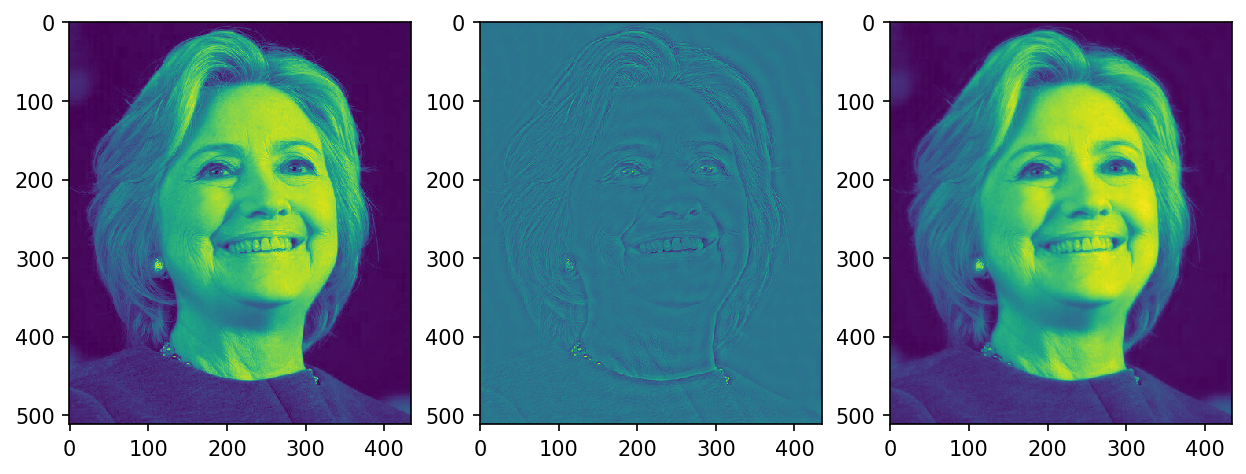

In [123]:

org=imgcli[:,:,0]
mod=iFcli0l.real
fig=plt.figure(1, figsize=(10, 6), dpi = 150)
plt.subplot(131)
plt.imshow(org)
plt.subplot(132)
plt.imshow(mod)
plt.subplot(133)
coef = 0.7
plt.imshow(org+coef*(org-mod))
plt.show()


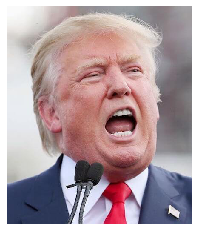

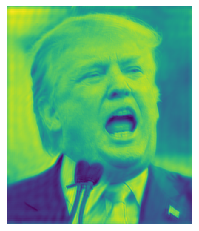

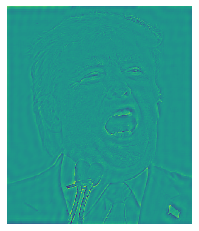

In [99]:
imgcli = plt.imread('trump.jpg')
ly,lx,lz = imgcli.shape

plt.imshow(imgcli)
plt.axis('off')
Fcli0 = np.fft.fft2(imgcli[:,:,0])
Fcli0_h = np.fft.fftshift(Fcli0)
Fcli0_l = np.fft.fftshift(Fcli0)

X, Y = np.ogrid[0:ly, 0:lx]
kcut = 70
mask_h = (X-lx/2.)**2 + (Y-ly/2.)**2 > kcut**2.
mask_l = (X-lx/2.)**2 + (Y-ly/2.)**2 < kcut**2.
Fcli0_h[mask_h] = 1.e-10*complex(1,1)
Fcli0_l[mask_l] = 1.e-10*complex(1,1)

iFcli0_h = np.fft.ifftshift(Fcli0_h)
iFcli0_l = np.fft.ifftshift(Fcli0_l)

iFcli0h = np.fft.ifft2(iFcli0_h)
iFcli0l = np.fft.ifft2(iFcli0_l)


plt.imshow(imgcli)
plt.show()
plt.imshow(iFcli0h.real)
plt.axis('off')
plt.show()

plt.imshow(iFcli0l.real)
plt.axis('off')
plt.show()



In [ ]:
F1=np.zeros((ly,lx), dtype='complex')
F2=np.zeros((ly,lx), dtype='complex')


Atru0 = np.abs(Ftru0)
Atru0 = np.abs(Ftru0)

Acli0 = np.abs(Fcli0)



In [112]:
Y, X= np.ogrid[0:ly, 0:lx] kcut=30 maskl = (X-lx/2.)**2 + (Y-ly/2.)**2 > kcut**2 maskh = (X-lx/2.)**2 + (Y-ly/2.)**2 < kcut**2
imgl=np.zeros((ly,lx,lz),dtype=np.uint8) imgh=np.zeros((ly,lx,lz),dtype=np.uint8) for i in range(3): Fimg=np.fft.fft2(img[:,:,i]) Fsftl=np.fft.fftshift(Fimg) Fsfth=np.fft.fftshift(Fimg) Fsftl[maskl] = 1.e-10*complex(1,1) Fsfth[maskh] = 1.e-10*complex(1,1) iFsftl=np.fft.ifftshift(Fsftl) iFsfth=np.fft.ifftshift(Fsfth) iFl=np.fft.ifft2(iFsftl) iFh=np.fft.ifft2(iFsfth) imgl[:,:,i]=iFl.real imgh[:,:,i]=iFh.real
plt.imshow(imgl) plt.axis('off') plt.show() plt.imshow(imgh) plt.axis('off')
plt.show()

SyntaxError: invalid syntax (<ipython-input-112-77df1c07536b>, line 1)